# <center>MVP for the EDA Project</center>
Abdulaziz Alshehri T5004

In [1]:
# Needed libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# plotting
import matplotlib.pyplot as plt
import folium
from folium import plugins

# 1 Loading Data
## MTA

In [2]:
# MTA
df_mta_original = pd.DataFrame()
for fname in ['151226', '160102', '160109', '160116', '160123', '160130', '160206']:
    path = 'C:/Users/alsah/Documents/W04/datasets/turnstile_' + fname + '.txt' # read locally
#     path = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + fname + '.txt' # or read online
    df_mta_original = df_mta_original.append(pd.read_csv(path, usecols=[0, 1, 2, 3, 6, 9, 10]))
df_mta_original = df_mta_original.reset_index().drop('index', 1)
df_mta = df_mta_original.copy()
df_mta

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,12/19/2015,5460344,1843674
1,A002,R051,02-00-00,LEXINGTON AVE,12/19/2015,5460357,1843686
2,A002,R051,02-00-00,LEXINGTON AVE,12/19/2015,5460448,1843797
3,A002,R051,02-00-00,LEXINGTON AVE,12/19/2015,5460702,1843864
4,A002,R051,02-00-00,LEXINGTON AVE,12/19/2015,5461157,1843945
...,...,...,...,...,...,...,...
1360633,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/05/2016,5554,231
1360634,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/05/2016,5554,231
1360635,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/05/2016,5554,231
1360636,TRAM2,R469,00-05-01,RIT-ROOSEVELT,02/05/2016,5554,231


## Stations Locations

In [3]:
# Stations
path = 'C:/Users/alsah/Documents/W04/datasets/STATIONS.csv' # read locally
# path = 'http://web.mta.info/developers/data/nyct/subway/Stations.csv' # or read online
df_stations_original = pd.read_csv(path, usecols=['Stop Name', 'GTFS Latitude', 'GTFS Longitude'])
df_stations = df_stations_original.copy()
df_stations

,Stop Name,GTFS Latitude,GTFS Longitude
0,Astoria-Ditmars Blvd,40.775036,-73.912034
1,Astoria Blvd,40.770258,-73.917843
2,30 Av,40.766779,-73.921479
3,Broadway,40.761820,-73.925508
4,36 Av,40.756804,-73.929575
...,...,...,...
491,Prince's Bay,40.525507,-74.200064
492,Pleasant Plains,40.522410,-74.217847
493,Richmond Valley,40.519631,-74.229141
494,Tottenville,40.512764,-74.251961


## Taxi

In [4]:
# Taxi
path = 'C:/Users/alsah/Documents/W04/datasets/yellow_tripdata_2016-01.csv' # read locally
# path = 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv' # or read online ~1.7 GB
df_taxi_original = pd.read_csv(path, usecols=['tpep_pickup_datetime', 'passenger_count', 'pickup_longitude', 
                                              'pickup_latitude'])
df_taxi = df_taxi_original.copy()
df_taxi

,tpep_pickup_datetime,passenger_count,pickup_longitude,pickup_latitude
0,2016-01-01 00:00:00,2,-73.990372,40.734695
1,2016-01-01 00:00:00,5,-73.980782,40.729912
2,2016-01-01 00:00:00,1,-73.984550,40.679565
3,2016-01-01 00:00:00,1,-73.993469,40.718990
4,2016-01-01 00:00:00,3,-73.960625,40.781330
...,...,...,...,...
10906853,2016-01-31 23:30:32,1,-74.003578,40.751011
10906854,2016-01-05 00:15:55,1,-73.945488,40.751530
10906855,2016-01-05 06:12:46,3,-73.994240,40.766586
10906856,2016-01-05 06:21:44,1,-73.948067,40.776531


# 2 Exploring & Cleaning
### MTA 

In [5]:
# each C/A + UNIT + SCP + STATION represent a turnstile
df_mta['TURN_ID'] = df_mta['C/A'] + df_mta['UNIT'] + df_mta['SCP'] + df_mta['STATION']

In [6]:
# Converting datatype into DATETIME
df_mta['DATE'] = pd.to_datetime(df_mta['DATE'])

In [7]:
# removing observations that are not within the wanted date range 
df_mta.drop(df_mta[
    (df_mta['DATE'] < pd.Timestamp(2016,1,1)) | 
    (df_mta['DATE'] > pd.Timestamp(2016,1,31)
    )].index, inplace=True)

In [8]:
# To be continued

## Stations

In [9]:
# To be continued

## Taxi

In [10]:
# To be continued

# 3 Merge MTA and MTA Locations

modifying stations names

In [11]:
stations_names = pd.DataFrame(sorted(df_stations['Stop Name'].str.lower().unique()), columns=['NAMES'])
mta_names = pd.DataFrame(sorted(df_mta['STATION'].str.lower().unique()), columns=['NAMES'])

In [12]:
matched = []
notmatched = []
for x in stations_names['NAMES']:
    if x in np.array(mta_names['NAMES']):
        matched.append(x)
    else:
        notmatched.append(x)

In [13]:
m = []
l = []
for val in notmatched:
    ii = int(len(val)/2)
    for i in range(ii, len(val)):
        if val[0:ii-i] in np.array(mta_names['NAMES']):
            m.append(val)
            l.append(val[0:ii-i])
            
names_manual = pd.Series(l, index=m).to_dict()

In [14]:
df_stations['Stop Name'] = df_stations['Stop Name'].str.lower().replace(names_manual).astype(str)
df_mta['STATION'] = df_mta['STATION'].str.lower() 

In [15]:
# getting locations
df_mta_with_locations = pd.merge(df_mta, df_stations, left_on='STATION', right_on='Stop Name', how='inner')
df_mta_with_locations

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,TURN_ID,Stop Name,GTFS Latitude,GTFS Longitude
0,A002,R051,02-00-00,59 st,2016-01-01,5477487,1848936,A002R05102-00-0059 ST,59 st,40.641362,-74.017881
1,A002,R051,02-00-00,59 st,2016-01-01,5477487,1848936,A002R05102-00-0059 ST,59 st,40.762526,-73.967967
2,A002,R051,02-00-00,59 st,2016-01-01,5477508,1848946,A002R05102-00-0059 ST,59 st,40.641362,-74.017881
3,A002,R051,02-00-00,59 st,2016-01-01,5477508,1848946,A002R05102-00-0059 ST,59 st,40.762526,-73.967967
4,A002,R051,02-00-00,59 st,2016-01-01,5477548,1848989,A002R05102-00-0059 ST,59 st,40.641362,-74.017881
...,...,...,...,...,...,...,...,...,...,...,...
1255949,S102,R165,00-05-01,tompkinsville,2016-01-31,703,0,S102R16500-05-01TOMPKINSVILLE,tompkinsville,40.636949,-74.074835
1255950,S102,R165,00-05-01,tompkinsville,2016-01-31,703,0,S102R16500-05-01TOMPKINSVILLE,tompkinsville,40.636949,-74.074835
1255951,S102,R165,00-05-01,tompkinsville,2016-01-31,703,0,S102R16500-05-01TOMPKINSVILLE,tompkinsville,40.636949,-74.074835
1255952,S102,R165,00-05-01,tompkinsville,2016-01-31,703,0,S102R16500-05-01TOMPKINSVILLE,tompkinsville,40.636949,-74.074835


# 4 Visualization 

In [16]:
# get uniuqe stations
df_mta_with_locations_uni = df_mta_with_locations.groupby(['STATION'])[['GTFS Latitude', 'GTFS Longitude']].max()

## Unique Stations Locations

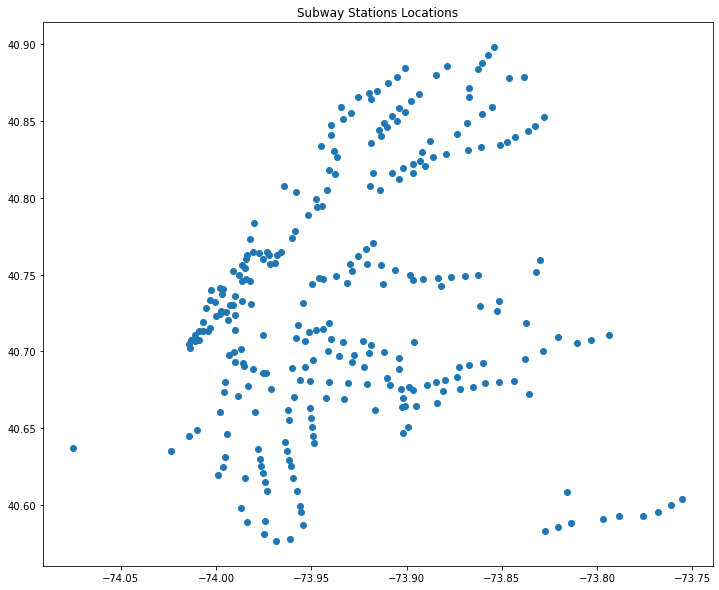

In [17]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df_mta_with_locations_uni['GTFS Longitude'],
            y=df_mta_with_locations_uni['GTFS Latitude'])
plt.title('Subway Stations Locations');

## Uniuqe Stations Locations Heatmap

In [18]:
m = folium.Map([40.72272154825336, -73.99502624542377], zoom_start=14)
# convert to (n, 2) nd-array format for heatmap
stationArr = df_mta_with_locations_uni[['GTFS Latitude', 'GTFS Longitude']].values
# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
m